<a href="https://colab.research.google.com/github/akashbauri/Project/blob/main/.stock%20data%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the CSV
df = pd.read_csv('/content/stocks_df.csv')  # Update with your actual path if needed
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908569 entries, 0 to 1908568
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Date        object 
 1   Stock       object 
 2   Open        float64
 3   High        float64
 4   Low         float64
 5   Close       float64
 6   Volume      float64
 7   Change Pct  float64
dtypes: float64(6), object(2)
memory usage: 116.5+ MB
None


In [4]:
print(df.head(10))

         Date      Stock   Open   High    Low  Close     Volume  Change Pct
0  2013-01-02  20MICRONS  80.35  80.55  77.50  77.80  1088880.0       -3.23
1  2013-01-03  20MICRONS  78.58  79.78  76.00  76.40   590180.0       -1.80
2  2013-01-04  20MICRONS  76.50  77.25  75.50  75.83   380850.0       -0.75
3  2013-01-07  20MICRONS  76.88  78.00  74.00  74.90  1144204.0       -1.23
4  2013-01-08  20MICRONS  74.97  75.97  74.25  75.28   605020.0        0.51
5  2013-01-09  20MICRONS  75.90  77.50  74.40  74.72   393190.0       -0.74
6  2013-01-10  20MICRONS  75.03  75.50  74.00  74.33   362922.0       -0.52
7  2013-01-11  20MICRONS  74.55  75.75  73.70  74.00   451474.0       -0.44
8  2013-01-14  20MICRONS  74.15  74.42  73.00  73.08   333356.0       -1.24
9  2013-01-15  20MICRONS  74.40  76.75  72.53  76.05  1198216.0        4.06


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Change Pct
count,1.908569e+06,1.908568e+06,1.908568e+06,1.908568e+06,1.908568e+06,1.908568e+06
mean,3.711527e+02,3.777266e+02,3.643376e+02,3.704634e+02,1.432529e+06,1.469907e-01
std,1.299864e+03,1.318566e+03,1.279420e+03,1.297423e+03,1.300691e+07,2.107182e+01
min,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,0.000000e+00,-9.882000e+01
25%,3.344000e+01,3.430000e+01,3.250000e+01,3.330000e+01,1.268300e+04,-1.510000e+00
50%,1.035000e+02,1.058550e+02,1.010000e+02,1.032000e+02,7.958900e+04,-5.000000e-02
75%,3.000000e+02,3.065000e+02,2.940000e+02,2.997000e+02,5.392865e+05,1.410000e+00
max,4.914800e+04,4.999000e+04,4.865145e+04,4.904985e+04,6.161122e+09,1.732879e+04


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print(df.isnull().sum())




Stock         0
Open          0
High          1
Low           1
Close         1
Volume        1
Change Pct    1
dtype: int64


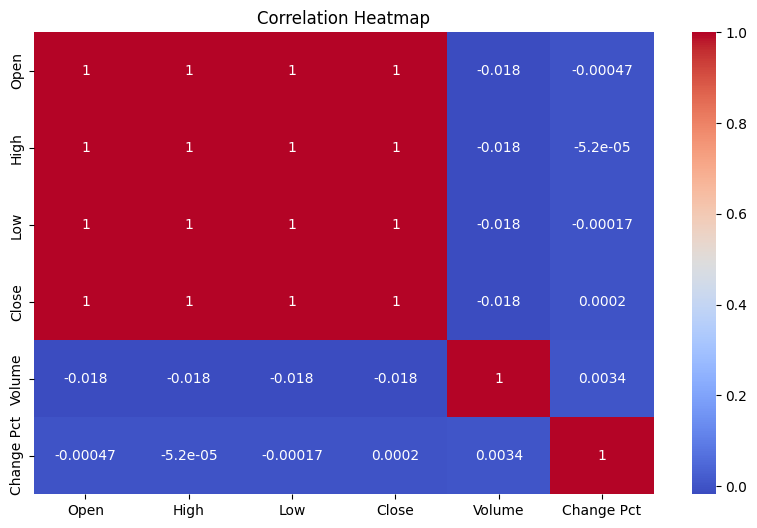

In [10]:
 #Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


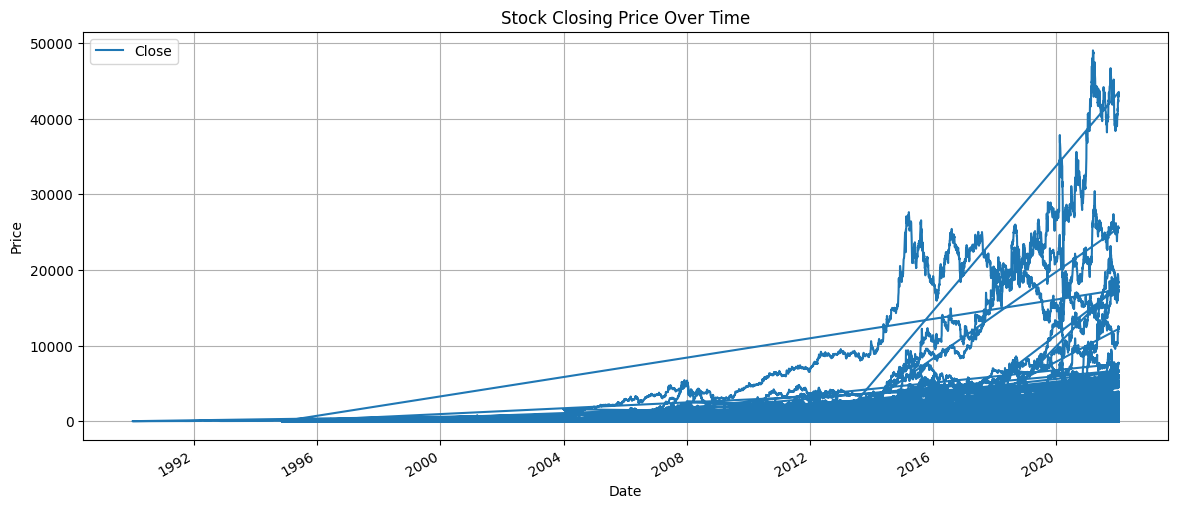

In [15]:
# Plot stock price trends
# Check if 'Date' column exists before converting to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# If 'Date' column doesn't exist, use index instead
else:
    df = df.reset_index()  # Reset index to have a numerical index
    df.index = pd.to_datetime(df.index)  # Convert index to datetime

df[['Close']].plot(figsize=(14,6), title='Stock Closing Price Over Time')
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

In [17]:
# Resample data to weekly or monthly if needed
df_ts = df['Close'].resample('M').mean()

<ipython-input-17-06801b31f4fa>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_ts = df['Close'].resample('M').mean()


In [19]:
# Train/test split
train = df_ts[:-12]
test = df_ts[-12:]

In [20]:
# Build and fit ARIMA model
model = ARIMA(train, order=(5,1,0))  # You can use auto_arima to find best params
model_fit = model.fit()

In [21]:
# Forecast
forecast = model_fit.forecast(steps=12)
forecast.index = test.index

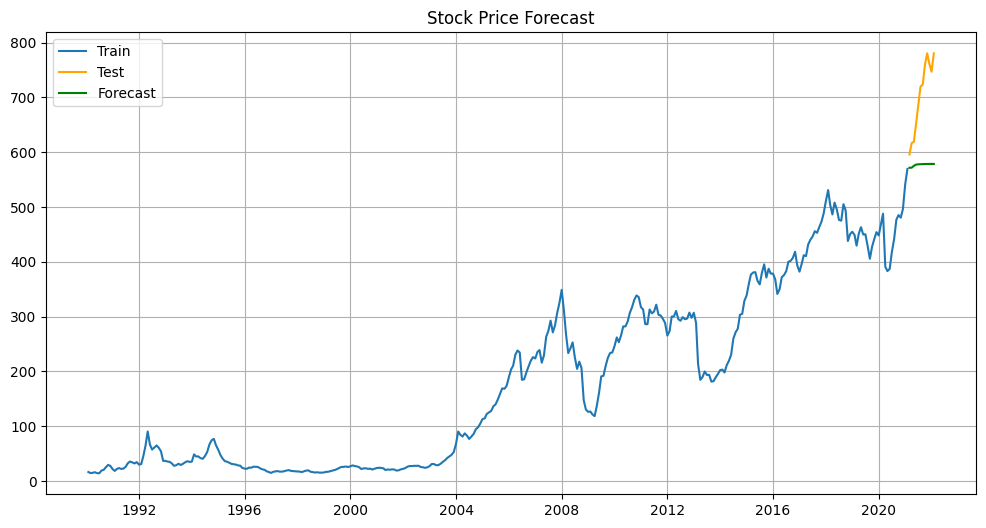

In [22]:
# Plot results
plt.figure(figsize=(12,6))
plt.plot(train, label='Train')
plt.plot(test, label='Test', color='orange')
plt.plot(forecast, label='Forecast', color='green')
plt.title('Stock Price Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [24]:
# Reset index for regression
df_reset = df.reset_index()
df_reset['Date_Ordinal'] = df_reset['Date'].map(pd.Timestamp.toordinal)

In [25]:
# Create features and target
X = df_reset[['Date_Ordinal']]
y = df_reset['Close']

In [26]:
# Train/test split
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

In [27]:
# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:

# Predict
y_pred = lr.predict(X_test)

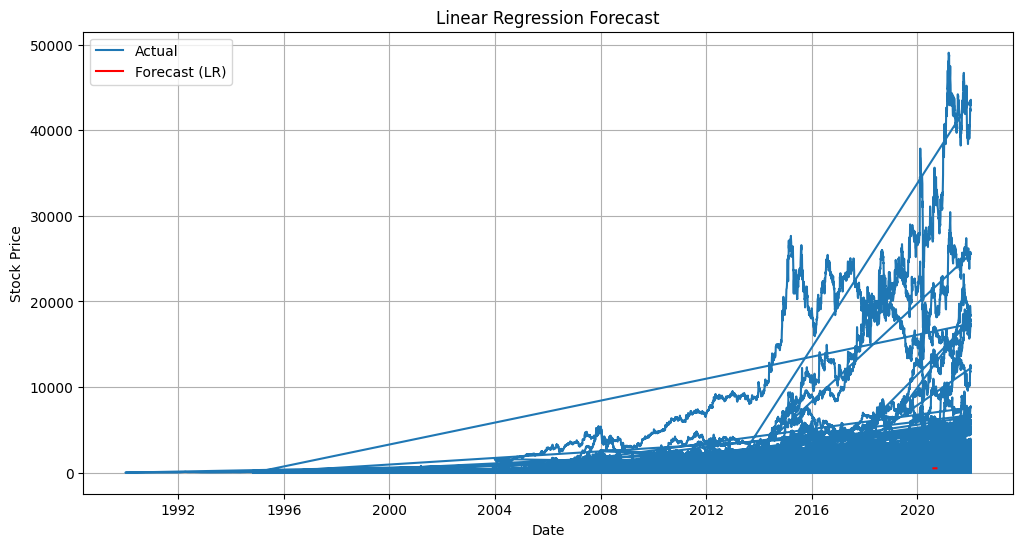

In [29]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(df_reset['Date'], df_reset['Close'], label='Actual')
plt.plot(df_reset['Date'][-30:], y_pred, label='Forecast (LR)', color='red')
plt.title('Linear Regression Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()